# Medical insurance stats

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns


from patsy import dmatrices
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load csv file 
df = pd.read_csv('../datasets/insurance.csv', index_col=False)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Age

In [38]:
df['age'].value_counts().head()

18    69
19    68
20    29
51    29
45    29
Name: age, dtype: int64

Text(0.5, 1.0, 'Distribution of Age')

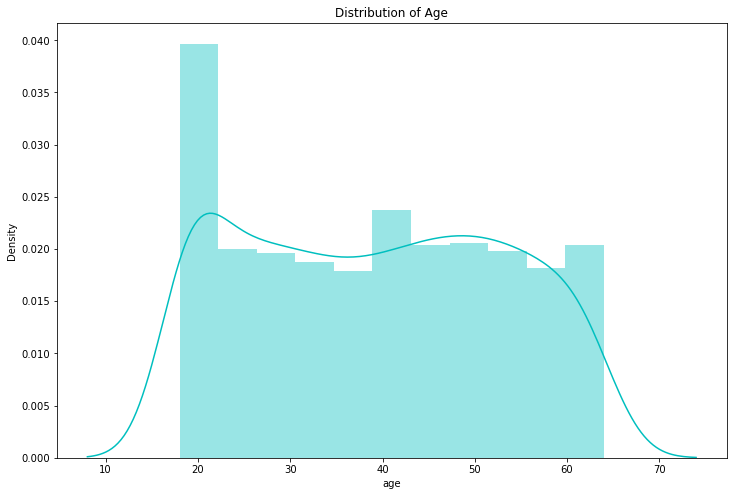

In [30]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['age'], kde = True, color = 'c')
plt.title('Distribution of Age')

As you can see from this plot the age distribution is unbalanced, with double the amount of 18 and 19 year olds than the others.

In [68]:
df['age2'] = df['age']**2

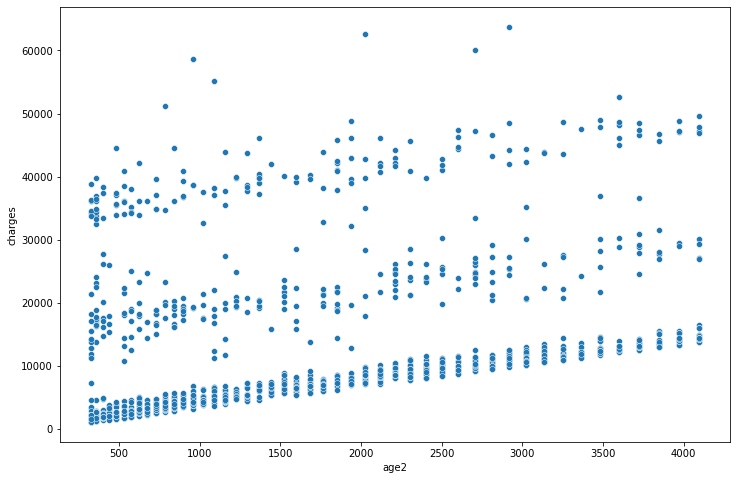

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.scatterplot(data=df, x='age2', y= 'charges')

# Sex

In [6]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [7]:
df.groupby('sex')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
male,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


<AxesSubplot:xlabel='sex', ylabel='charges'>

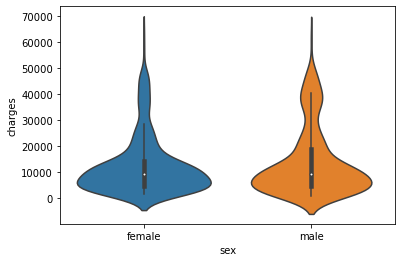

In [8]:
sns.violinplot(data=df, x='sex', y='charges')

Males 75th quartile and maximum are higher than females, although on average they are very similar. 

## Region

In [9]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [10]:
df.groupby('region')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.384516,11255.803066,1694.7964,5194.322288,10057.652025,16687.3641,58571.07448
northwest,325.0,12417.575374,11072.276928,1621.3402,4719.736550,8965.795750,14711.7438,60021.39897
southeast,364.0,14735.411438,13971.098589,1121.8739,4440.886200,9294.131950,19526.2869,63770.42801
southwest,325.0,12346.937377,11557.179101,1241.5650,4751.070000,8798.593000,13462.5200,52590.82939


<AxesSubplot:xlabel='region', ylabel='charges'>

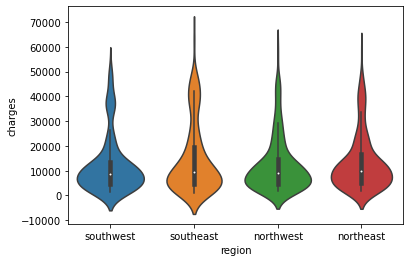

In [11]:
sns.violinplot(data=df, x='region', y='charges')

The Eastern regions on average pay more medical insurnace although from this it looks like that Region has not enough affect on the charges from medical insurance. 

## Smoker

In [12]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [13]:
df.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


<AxesSubplot:xlabel='smoker', ylabel='charges'>

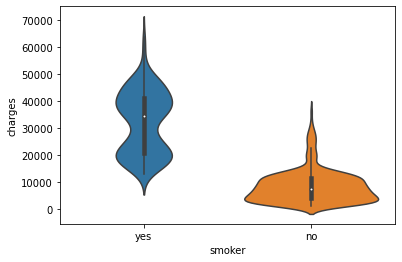

In [14]:
sns.violinplot(data=df, x='smoker', y='charges')

However, Smoking does have an impact on charges from medical insurance

# Children

In [15]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [16]:
df.groupby('children')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,12365.975602,12023.293942,1121.8739,2734.421150,9856.95190,14440.123825,63770.42801
1,324.0,12731.171832,11823.631451,1711.0268,4791.643175,8483.87015,15632.052050,58571.07448
2,240.0,15073.563734,12891.368347,2304.0022,6284.939438,9264.97915,20379.276748,49577.66240
3,157.0,15355.318367,12330.869484,3443.0640,6652.528800,10600.54830,19199.944000,60021.39897
4,25.0,13850.656311,9139.223321,4504.6624,7512.267000,11033.66170,17128.426080,40182.24600
5,18.0,8786.035247,3808.435525,4687.7970,5874.973900,8589.56505,10019.943975,19023.26000


<AxesSubplot:xlabel='children', ylabel='charges'>

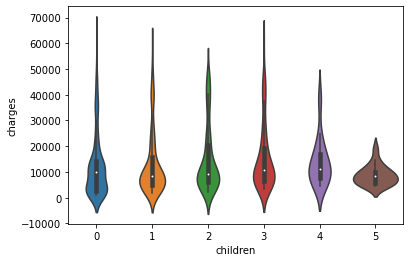

In [17]:
sns.violinplot(data=df, x='children', y='charges')

Although, it looks like on average people with 4 or 5 children pay less on average. The sample sizes are relatively small incomparison to people with less than 4 children so, this data is likely not accurate enough. however, comparing  less than 2 children (12k) with having 2 or 3 children (15k) looks like the more children you have on average the cost is slightly higher. 

Text(0.5, 1.0, 'Distribution of children')

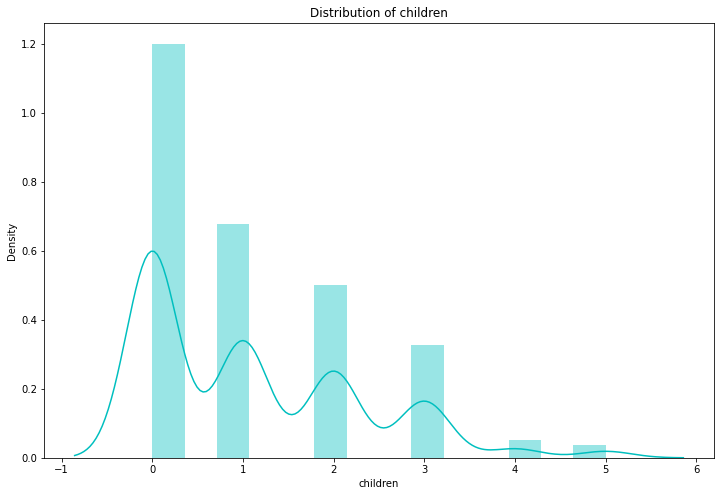

In [29]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['children'], kde = True, color = 'c')
plt.title('Distribution of children')

# BMI
A bit of feature engineering for this one, as the continous data bmi is probably understood better in categeories. according to the BMI indicators: underweight < 18, healthy 18 < 25, overweight 25 < 30, obese > 30. 

In [18]:
bins = [0,18.5,25,30, 100]
slots = ['under-weight','healthy','over-weight', 'obese']

df['Bmi_range']=pd.cut(df['bmi'],bins=bins,labels=slots)
df.head()

,age,sex,bmi,children,smoker,region,charges,Bmi_range
0,19,female,27.900,0,yes,southwest,16884.92400,over-weight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,healthy
4,32,male,28.880,0,no,northwest,3866.85520,over-weight


In [19]:
df['Bmi_range'].value_counts()

obese           705
over-weight     386
healthy         226
under-weight     21
Name: Bmi_range, dtype: int64

<AxesSubplot:xlabel='Bmi_range', ylabel='Count'>

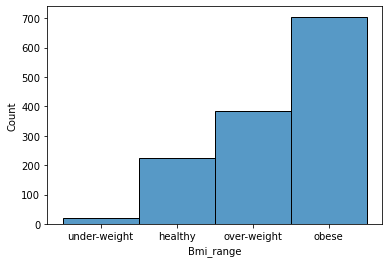

In [37]:
sns.histplot(data=df, x='Bmi_range')

In [21]:
df.groupby('Bmi_range')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
Bmi_range,,,,,,,,
under-weight,21.0,8657.620652,7591.730101,1621.3402,2775.192150,6640.544850,12829.455100,32734.18630
healthy,226.0,10435.440719,7484.434940,1121.8739,4146.836312,8604.153525,15197.264325,35069.37452
over-weight,386.0,10997.803881,8067.254166,1252.4070,4593.881375,8659.378000,15751.161360,38245.59327
obese,705.0,15560.926321,14563.057442,1131.5066,5240.765000,9964.060000,19673.335730,63770.42801


<AxesSubplot:xlabel='Bmi_range', ylabel='charges'>

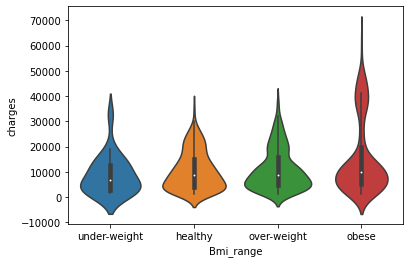

In [22]:
sns.violinplot(data=df, x='Bmi_range', y='charges')

# BMI and smokers

In [24]:
df.groupby(['Bmi_range', 'smoker'])['charges'].describe()

count          mean          std          min  \
Bmi_range    smoker                                                  
under-weight no       16.0   5485.056800  3769.939768   1621.34020   
             yes       5.0  18809.824980  8110.514545  12829.45510   
healthy      no      176.0   7734.650116  5823.918126   1121.87390   
             yes      50.0  19942.223641  4202.479709  13747.87235   
over-weight  no      311.0   8226.088675  5910.704683   1252.40700   
             yes      75.0  22491.182935  5105.870553  15518.18025   
obese        no      561.0   8853.277294  6105.077558   1131.50660   
             yes     144.0  41692.808992  5829.158699  32548.34050   

                              25%          50%           75%          max  
Bmi_range    smoker                                                        
under-weight no       2657.029225   4249.32355   7569.548200  13204.28565  
             yes     14455.644050  15006.57945  19023.260000  32734.18630  
healthy      no       3199.996038   6669.48005  10254.058312  30166.61817  
             yes     16687.364100  19479.90370  22133.791175  35069.37452  
over-weight  no       4135.582175   7046.72220  11084.082000  35160.13457  
             yes     18488.329900  21348.70600  24791.319925  38245.59327  
obese        no       4320.410850   8083.91980  11763.000900  36910.60803  
             yes     37243.904350  40918.31450  45704.068725  63770.42801

People who are obese and smoke on average pay double what overweight smoker, and pay 5 times more than a healthy non-smoker.

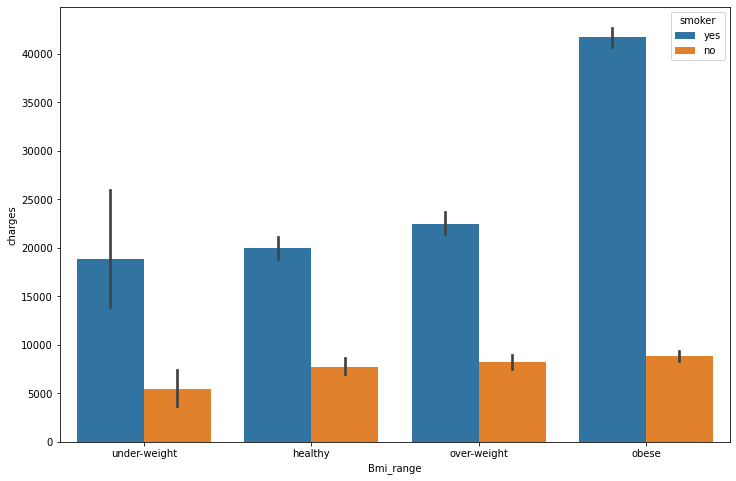

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Bmi_range', y='charges', hue='smoker', data=df)

# BMI and age

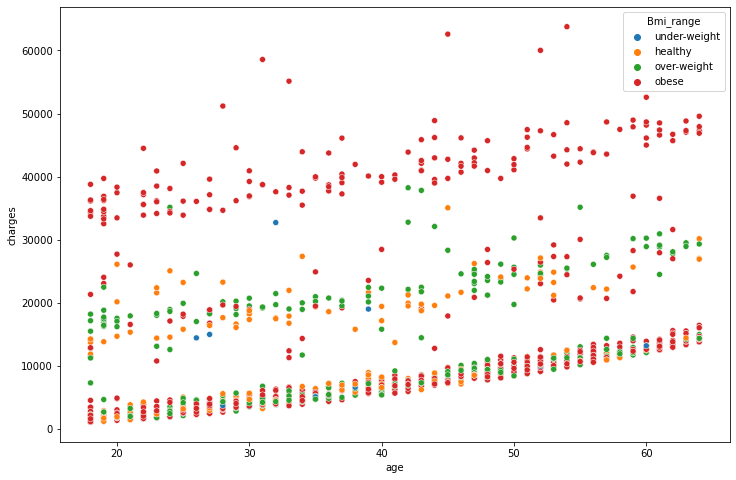

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.scatterplot(data=df, x='age', y= 'charges', hue='Bmi_range')

# BMI, smoker & age

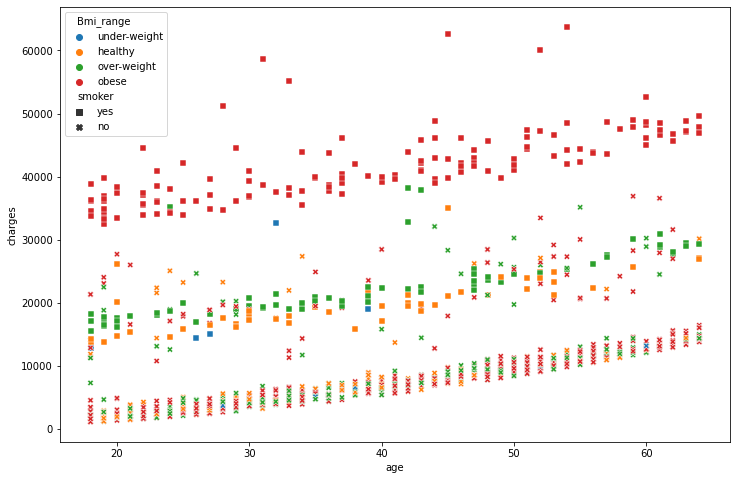

In [53]:
markers = {"yes": "s", "no": "X"}
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.scatterplot(data=df, x='age', y= 'charges', hue='Bmi_range', style='smoker',markers=markers)

## Model

In [67]:
# create a fitted model in one line
lm = smf.ols(formula='charges ~ Bmi_range + smoker + age + region + sex + children', data=df).fit()

# print the coefficients
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     409.3
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:50:39   Log-Likelihood:                -13536.
No. Observations:                1338   AIC:                         2.709e+04
Df Residuals:                    1327   BIC:                         2.715e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [18]:
3165.885006+257.722619*500

132027.194506

In [19]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'age': [500]})
X_new.head()

,age
0,500


In [20]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    132027.19434
dtype: float64

In [21]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'age': [df.age.min(), df.age.max()]})
X_new.head()

,age
0,18
1,64


In [22]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0     7804.892142
1    19660.132601
dtype: float64

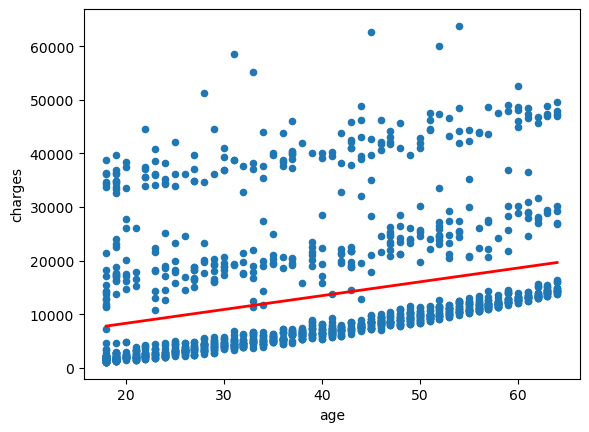

In [24]:
# first, plot the observed data
df.plot(kind='scatter', x='age', y='charges')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)
     

In [25]:
lm.conf_int()

,0,1
Intercept,1327.440272,5004.329740
age,213.578754,301.866483
